In [3]:
import cv2
import numpy as np

In [25]:
import matplotlib.pyplot as plt

In [4]:
import os

In [6]:
!open .

画像概要
- AN - 折れてない画像
- AF - 折れてる画像
- LF - 側面のおれている画像
- LN - 側面の折れていない画像

In [20]:
!ls image_class/AN

0649350_3_N_A.tif 0879644_1_N_A.tif 0998281_3_N_A.tif 1137940_3_N_A.tif
0650636_1_N_A.tif 0880613_4_N_A.tif 1000698_1_N_A.tif 1144594_1_N_A.tif
0716260_3_N_A.tif 0889941_3_N_A.tif 1022780_5_N_A.tif 1145325_1_N_A.tif
0721428_2_N_A.tif 0894090_2_N_A.tif 1026437_3_N_A.tif 1149300_1_N_A.tif
0739795_3_N_A.tif 0896522_1_N_A.tif 1027627_3_N_A.tif 1152697_1_N_A.tif
0741482_4_N_A.tif 0903483_3_N_A.tif 1031774_2_N_A.tif 1154569_1_N_A.tif
0761630_5_N_A.tif 0906085_3_N_A.tif 1035641_2_N_A.tif 1157728_3_N_A.tif
0769277_3_N_A.tif 0908199_2_N_A.tif 1037945_2_N_A.tif 1159521_1_N_A.tif
0772194_3_N_A.tif 0909700_8_N_A.tif 1048087_6_N_A.tif 1161560_1_N_A.tif
0775572_1_N_A.tif 0922344_1_N_A.tif 1049798_1_N_A.tif 1168362_1_N_A.tif
0798019_1_N_A.tif 0925426_3_N_A.tif 1051152_1_N_A.tif 1168457_2_N_A.tif
0814648_3_N_A.tif 0938174_3_N_A.tif 1051189_4_N_A.tif 1168457_3_N_A.tif
0823302_2_N_A.tif 0950257_4_N_A.tif 1068881_2_N_A.tif 1171388_3_N_A.tif
0834560_1_N_A.tif 0953302_4_N_A.tif 1077330_2_N_A.tif 1173451_3_

In [93]:
img = cv2.imread("image_class/AN" + "/"  + os.listdir("image_class/AN")[0])

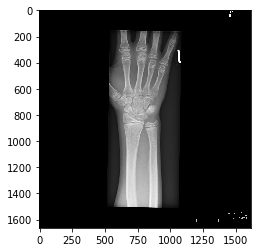

In [94]:
plt.imshow(img)

In [96]:
img.shape

(1664, 1619, 3)

In [99]:
dim = (1617, 1664)

In [102]:
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

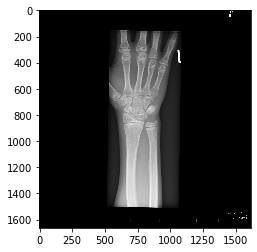

In [104]:
plt.imshow(img)

In [34]:
len(os.listdir("image_class/AN"))

83

In [ ]:
    img = cv2.imread(path)
    img.resize(1617, 3)

In [105]:
dim = (1617, 1664)

In [106]:
data_negative = []
for filename in os.listdir("image_class/AN"):
    path = os.path.join("image_class/AN",filename)
    img = cv2.imread(path)
    resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)    
    data_negative.append(resize_img)

In [107]:
data_positive = []
for filename in os.listdir("image_class/AF"):
    path = os.path.join("image_class/AF",filename)
    img = cv2.imread(path)
    resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    data_positive.append(resize_img)

In [109]:
data_negative.extend(data_positive)

In [110]:
data = data_negative

教師情報
- 0 : 折れていない
- 1 : 折れてる    

In [111]:
target = [0] * len(os.listdir("image_class/AN")) + [1] * len(os.listdir("image_class/AF"))

In [119]:
td = np.asarray(data)

In [121]:
len(target)

176

In [130]:
td[0].reshape(-1).shape

(8072064,)

In [131]:
td = td.reshape(176, -1)

In [68]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [66]:
classifier = svm.SVC(gamma=0.001)

In [113]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                 hidden_layer_sizes=(5, 2), random_state=1)

In [132]:
X_train, x_test, Y_train, Y_test = train_test_split(
    td, target, test_size=0.5, shuffle=True
)

In [ ]:
classifier.fit(X_train, Y_train)